In [296]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
rng = np.random.default_rng()

# Question 1

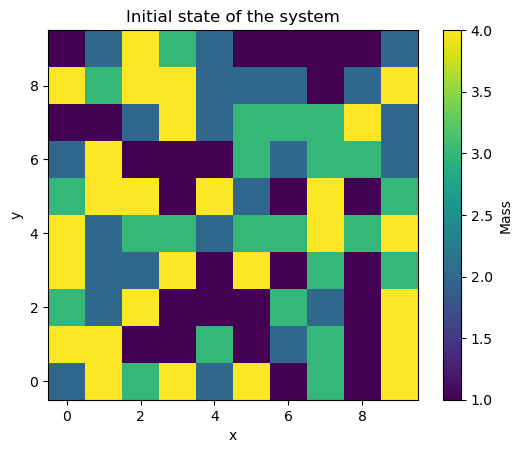

In [297]:
# Part A
boxlen=10
particles = rng.integers(1,5,size=(boxlen,boxlen))
particles_copy1 = np.copy(particles)
particles_copy2 = np.copy(particles)

plt.figure()
plt.title('Initial state of the system')
plt.imshow(particles, cmap='viridis', origin='lower')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='Mass')


In [298]:
# Part B
    
def update_swap(particles):
    '''
    Swaps the particles if the change in GPE is negative
    after their swap

    Inputs:
    particles   10x10 array of particles

    Outputs:
    de          Change in energy after swap
    '''
    # Calculating initial GPE
    initial_gpe = (particles * np.arange(10)[:, np.newaxis]).sum()

    # Choosing two random particles
    p1 = np.random.randint(10), np.random.randint(10)
    p2 = np.random.randint(10), np.random.randint(10)

    # Swapping 
    particles[p1], particles[p2] = particles[p2], particles[p1]

    # Calculating new GPE
    new_gpe = (particles * np.arange(10)[:, np.newaxis]).sum()

    # If new GPE is lower, keep the swap, otherwise swap back
    if new_gpe < initial_gpe:
        energy_change = new_gpe - initial_gpe
    else:
        particles[p1], particles[p2] = particles[p2], particles[p1]
        energy_change = 0

    return energy_change

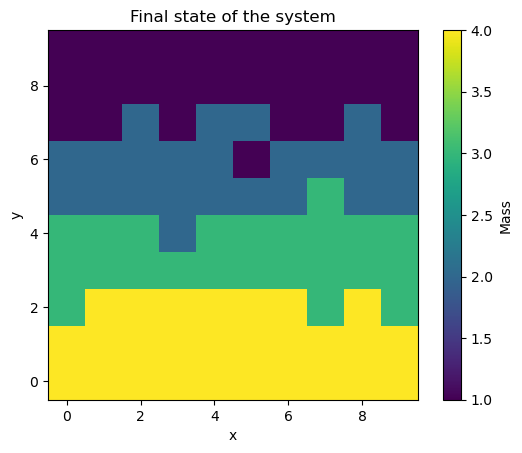

In [299]:
# Part C
Nsteps = 5000
etot = np.zeros(Nsteps)
etot[0] = (particles * np.arange(10)[:, np.newaxis]).sum()

for i in range(1,Nsteps):
    de = update_swap(particles)
    etot[i] = etot[i-1] + de

# Displaying final state
plt.imshow(particles, cmap='viridis', origin='lower')
plt.title('Final state of the system')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='Mass')

Estimated converged value: 807.0 J


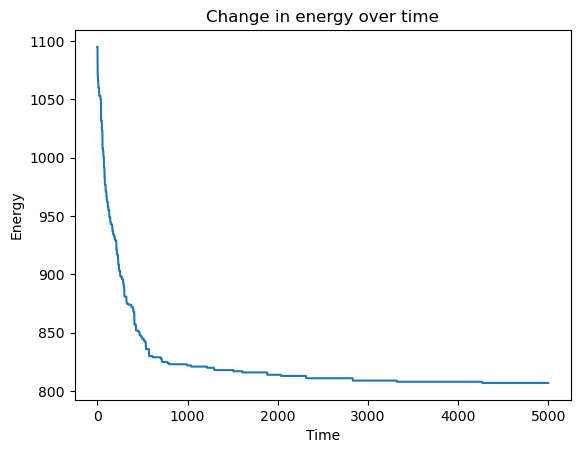

In [300]:
# Part D

plt.plot(etot)
plt.title('Change in energy over time')
plt.xlabel('Time')
plt.ylabel('Energy')

print(f'Estimated converged value: {etot[-1]} J')

In [301]:
# Part E

def update_swap(particles):
    '''
    Swaps the particles if the change in GPE is negative
    after their swap

    Inputs:
    particles   10x10 array of particles

    Outputs:
    de          Change in energy after swap
    '''
    initial_gpe = (particles * np.arange(10)[:, np.newaxis]).sum()

    p1 = np.random.randint(10), np.random.randint(10)
    p2 = np.random.randint(10), np.random.randint(10)

    particles[p1], particles[p2] = particles[p2], particles[p1]

    new_gpe = (particles * np.arange(10)[:, np.newaxis]).sum()

    energy_change = new_gpe - initial_gpe
    boltzmann_factor = np.exp(-energy_change / beta)

    if new_gpe < initial_gpe or np.random.rand() < boltzmann_factor:
        pass
    else:
        particles[p1], particles[p2] = particles[p2], particles[p1]
        energy_change = 0

    return energy_change

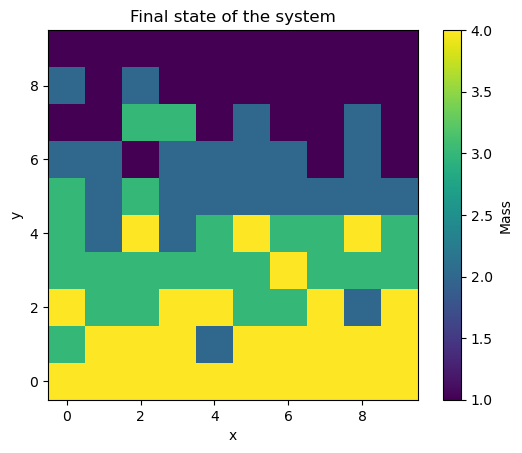

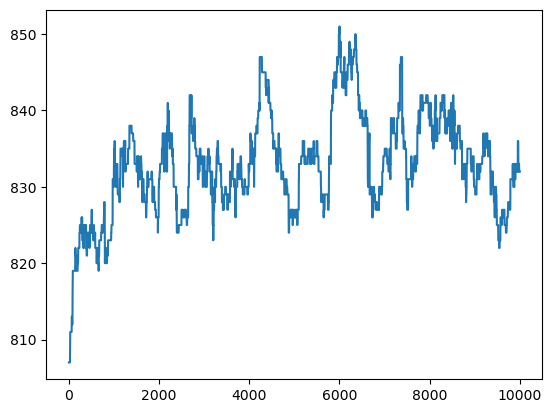

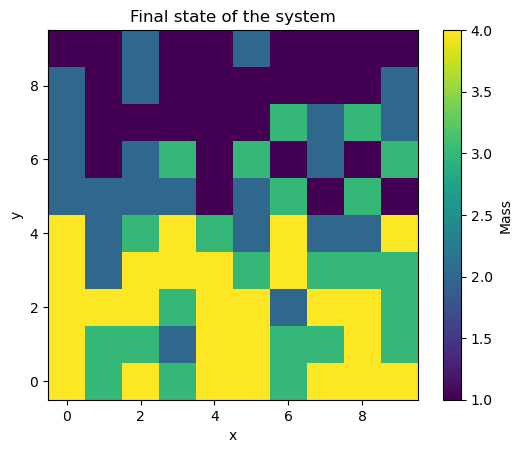

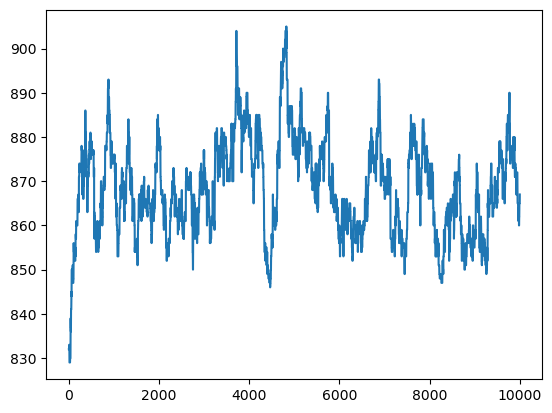

In [302]:
# Part F

# First case
beta = 1 
Nsteps = 10000
etot = np.zeros(Nsteps+1)
etot[0] = (particles * np.arange(10)[:, np.newaxis]).sum()

for i in range(1,Nsteps):
    de = update_swap(particles)
    etot[i] = etot[i-1] + de

plt.imshow(particles, cmap='viridis', origin='lower')
plt.title('Final state of the system')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='Mass')

plt.figure()
plt.plot(etot[:-1])

# Second case
beta = 2
Nsteps = 10000
etot = np.zeros(Nsteps+1)
etot[0] = (particles * np.arange(10)[:, np.newaxis]).sum()

for i in range(1,Nsteps):
    de = update_swap(particles)
    etot[i] = etot[i-1] + de

plt.figure()
plt.imshow(particles, cmap='viridis', origin='lower')
plt.title('Final state of the system')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='Mass')

plt.figure()
plt.plot(etot[:-1])



# Question 2

In [303]:
# Part A

def jacobi_update(phi, rho, h):
    # Make a copy of the potential array
    new_phi = np.copy(phi)

    # Looping over interior points
    for i in range(1, phi.shape[0]-1):
        for j in range(1, phi.shape[1]-1):
            # Jacobi method 
            new_phi[i,j] = (1/4) * (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1] - h**2 * rho[i,j])

    return new_phi


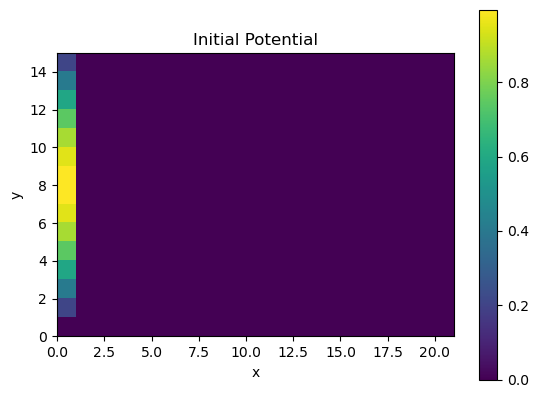

In [304]:
# Part B

phi = np.zeros((21,15))

# Define domain parameters
a = 21
b = 15
h = 1
x = np.arange(0, a, h)
y = np.arange(0, b, h)

# Create arrays to store potential and charge density
phi = np.zeros((a, b))
rho = np.zeros_like(phi)

# Boundary conditions on potential
phi[:,0] = 0
phi[:,-1] = 0
phi[0,:] = np.sin(np.pi*y/b)
phi[-1,:] = 0

# Initial potential
plt.imshow(phi.T, origin='lower', extent=[0,a,0,b])
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Initial Potential')
plt.show()


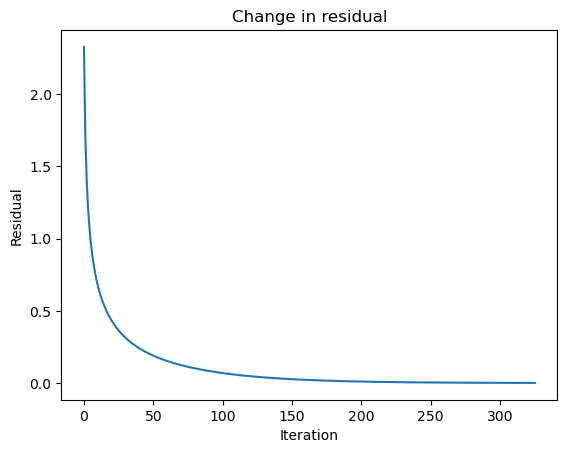

In [305]:
# Part C

# Jacobi iteration until residual is less than 0.001
r = 1
residuals = []
while r > 0.001:
    # Copying current potential array to use as input in Jacobi function
    phi_in = phi.copy()
    # Performing single Jacobi iteration and updating potential array
    phi = jacobi_update(phi_in, rho, h)
    # Calculating residual and storing it in residuals list
    r = np.sum(np.abs(phi - phi_in))
    residuals.append(r)

plt.plot(residuals)
plt.xlabel('Iteration')
plt.ylabel('Residual')
plt.title('Change in residual')
plt.show()


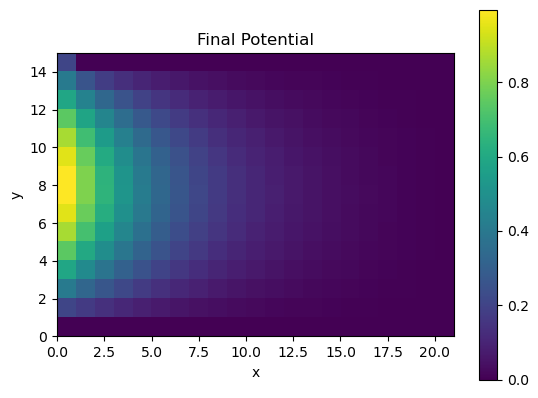

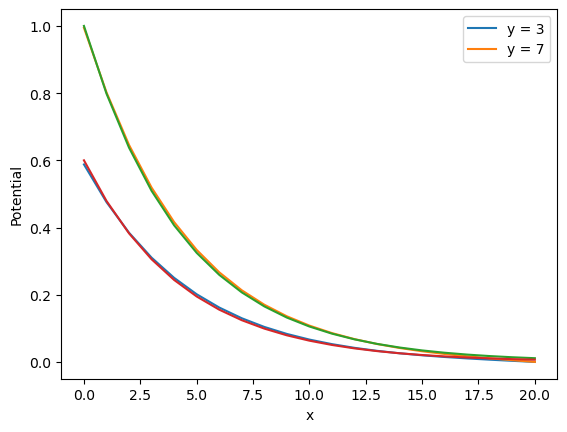

In [306]:
# Part D

plt.figure()
plt.imshow(phi.T, origin='lower', extent=[0,a,0,b])
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Final Potential')

# Two arbitrary values of y
y1 = 3
y2 = 7

plt.figure()
plt.plot(x, phi[:, y1], label=f'y = {y1}')
plt.plot(x, phi[:, y2], label=f'y = {y2}')
plt.xlabel('x')
plt.ylabel('Potential')
plt.legend()

k=0.225
plt.plot(x, np.exp(-k*x), label=r'')

k=0.225
plt.plot(x, 0.6*np.exp(-k*x))

The function that fits the graph best is $ \phi(x) = Ae^{-Bx} $ with $B\approx 0.225$ working as a good approximation in both cases, and $A=0.6$ working in the second case.

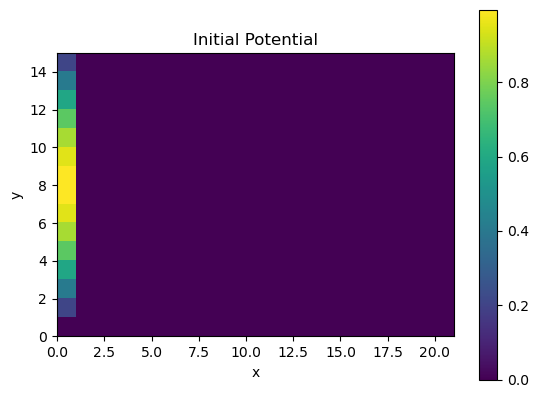

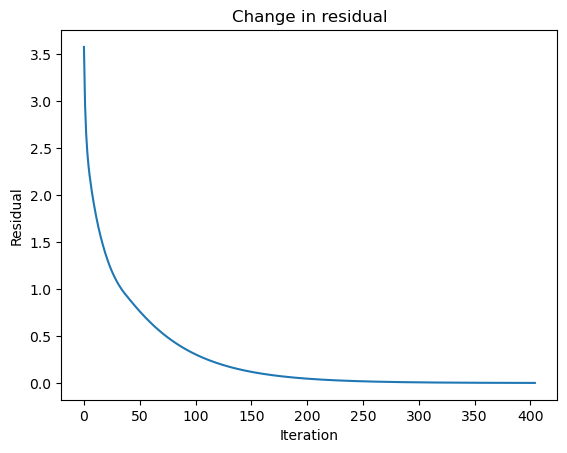

Text(0.5, 1.0, 'Final Potential')

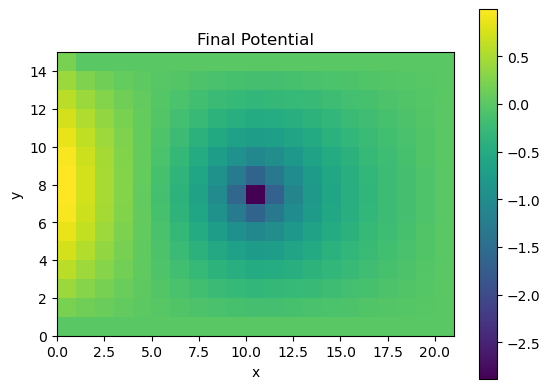

In [307]:
# Part E

phi = np.zeros((21,15))

# Define domain parameters
a = 21
b = 15
h = 1
x = np.arange(0, a, h)
y = np.arange(0, b, h)

# Create arrays to store potential and charge density
phi = np.zeros((a, b))
rho = np.zeros_like(phi)

# Boundary conditions on potential
rho[int(a/2), int(b/2)] = 5
phi[:,0] = 0
phi[:,-1] = 0
phi[0,:] = np.sin(np.pi*y/b)
phi[-1,:] = 0

# Initial potential
plt.imshow(phi.T, origin='lower', extent=[0,a,0,b])
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Initial Potential')
plt.show()

r = 1
residuals = []
while r > 0.001:
    phi_in = phi.copy()
    phi = jacobi_update(phi_in, rho, h)
    r = np.sum(np.abs(phi - phi_in))
    residuals.append(r)

plt.plot(residuals)
plt.xlabel('Iteration')
plt.ylabel('Residual')
plt.title('Change in residual')
plt.show()

plt.figure()
plt.imshow(phi.T, origin='lower', extent=[0,a,0,b])
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Final Potential')

